In [ ]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=0&single=true&output=csv') # FULL DATASET - 0.958
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=2084779562&single=true&output=csv') # ONLY CLASSIC - 0.958
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=560410691&single=true&output=csv') # ONLY LATE-ONSET
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=1383392897&single=true&output=csv') # ONLY AMENABLE
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=1443616605&single=true&output=csv') # ONLY NOT AMENABLE
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=1449239318&single=true&output=csv') # CLASS 0 MUTED
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=2116880999&single=true&output=csv') # CLASS 1 MUTED
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=693494787&single=true&output=csv') # CLASS 2 MUTED
# sequences = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDD8GOkotLEsmiiSs6Axki4ddSNKKSvVCHMRtgNjpFgN4-IfjS0KhWmSLB6WZnz3aDeLjcQgKMfe8/pub?gid=247111228&single=true&output=csv') # CLASS 3 MUTED
sequences

,sequences,class
0,ACTCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,0
1,ACCCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,0
2,ACACAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,0
3,ACGCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,0
4,CGTCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,0
...,...,...
315,ATGCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,3
316,ATGCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,3
317,ATGCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,3
318,ATGCAGCTGAGGAACCCAGAACTACATCTGGGCTGCGCGCTTGCGC...,3


In [ ]:
# k-mers function
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

# finding sequences
sequences['words'] = sequences.apply(lambda x: getKmers(x['sequences']), axis=1)
sequences = sequences.drop('sequences', axis=1)
sequences.head()

# getting classes
sequence_texts = list(sequences['words'])
for item in range(len(sequence_texts)):
    sequence_texts[item] = ' '.join(sequence_texts[item])
y_data = sequences.iloc[:, 0].values

# vectorization of nucleotide sequences
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(8,8))
X = cv.fit_transform(sequence_texts)

# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data,
                                                    test_size = 0.15,
                                                    random_state = 42)

# defining classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train, y_train)

# making predictions
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0  1   2   3
Actual                  
0          15  0   0   0
1           0  8   1   0
2           0  1  12   0
3           0  0   0  11
accuracy = 0.958 
precision = 0.958 
recall = 0.958 
f1 = 0.958


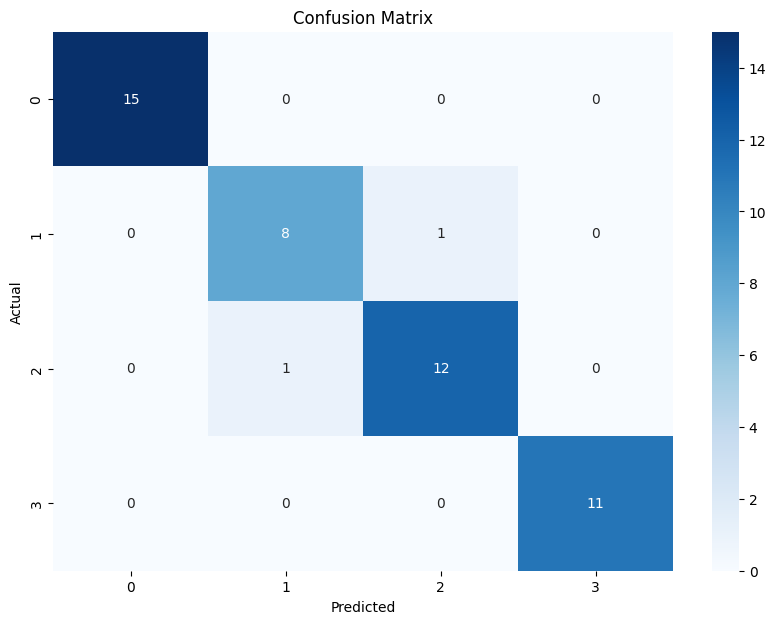

<ipython-input-7-a603fa383cce>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


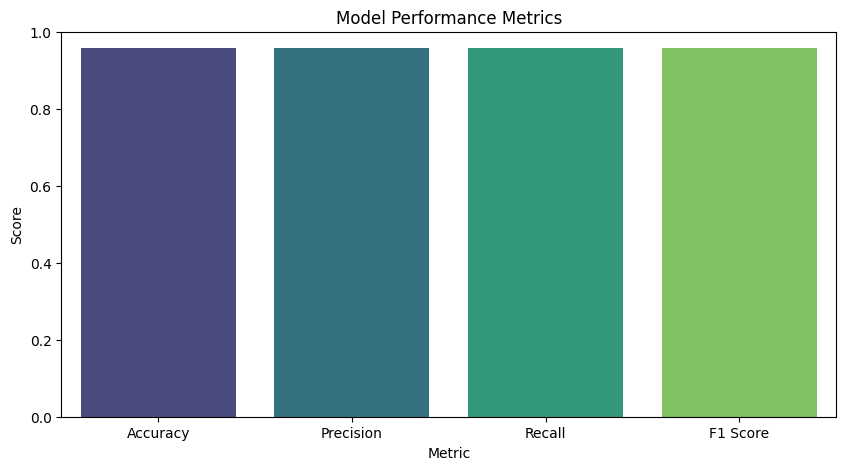

accuracy = 0.958 
precision = 0.958 
recall = 0.958 
f1 = 0.958


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compute metrics
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

# Metrics Bar Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

# Print metrics
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))